# Project 1: Digit Classification with KNN and Naive Bayes
## Author: Colby Carter

***DUE OCT 9TH AT MIDNIGHT***

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [3]:
#tester
#mini_train_data[0].reshape((28,28))

(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

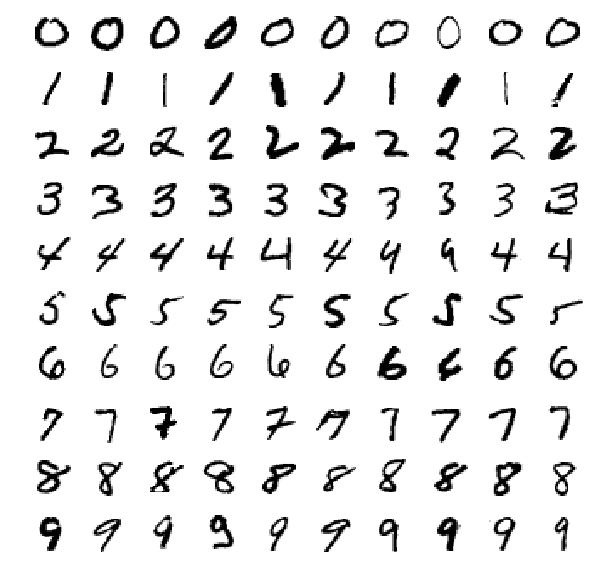

In [4]:
def P1(num_examples=10, digits = [1]):
    """create 10x10 of examples for each digit from X"""
    #number of rows/digits for looping
    digits = digits
    image_dict = {}
    
    """Loop over each digit and add to dictionary"""
    for dig in digits:
        image_dict[dig] = []
        counter = 0
        """if label matches digit, save training data location"""
        while (len(image_dict[dig]) < num_examples):
            if (mini_train_labels[counter] == dig):
                image_dict[dig].append(counter)
            counter += 1
    #print(image_dict)
    
    """create 10x10 subplots"""
    fig, ax = plt.subplots(len(digits), num_examples, figsize=(10, 10))
    for dig in digits:
        for ex in range(0, num_examples):
            row = image_dict[dig][ex]
            ax[dig][ex].imshow(mini_train_data[row].reshape(28,28), cmap = "gray_r")
            ax[dig][ex].axis('off')
    
digits = [i for i in range(0,10)]
P1(10, digits)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the development set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
#dev_data, dev_labels
#mini_train_data, mini_train_labels

def P2(k_values):
    """Predict labels of development set for a list of values for K neighbors"""

### STUDENT START ###
    models = []
    model_num = 0

    for k in k_values:
        models.append(KNeighborsClassifier(k))
        models[model_num].fit(mini_train_data, mini_train_labels)
        models[model_num].predict(dev_data)
        print("Predictions Using", k, "Nearest Neighbor(s):")
        print(classification_report(dev_labels, models[model_num].predict(dev_data)), "\n")
        model_num += 1

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Predictions Using 1 Nearest Neighbor(s):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000
 

Predictions Using 3 Nearest Neighbor(s):
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0

**ANSWER**: For lower values of k (<=5), it appears 3 is the most difficult to predict, followed closely by 9 and then 1. For values above k=5, the models do worst for 1, followed by 9 and then 3.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes, accuracies=[]):

### STUDENT START ###
    k = 1
    models = []
    model_num = 0 

    for size in train_sizes:
        """compute the accuracy (score) for each size n"""
        models.append(KNeighborsClassifier(k))
        
        t0 = time.time()
        models[model_num].fit(train_data[0:size], train_labels[0:size])
        models[model_num].predict(dev_data)
        score = models[model_num].score(dev_data, dev_labels)
        t1 = time.time()
        time_elapsed = t1 - t0
        print("For training size of " + "{:.0f}".format(size) + " (k=1): accuracy = " + "{:.3f}".format(score) + "   (" + "{:.3f}".format(time_elapsed) + " seconds)")
        accuracies.append(score)
        model_num += 1
    
    """v-stack and return the accuracies for problem 4"""
    return np.array(accuracies)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#train_sizes = [100, 200, 400, 800]
accuracies = []
#P3(train_sizes, accuracies)
y_accuracies = P3(train_sizes, accuracies)
#print(y_accuracies)

For training size of 100 (k=1): accuracy = 0.720   (0.258 seconds)
For training size of 200 (k=1): accuracy = 0.786   (0.497 seconds)
For training size of 400 (k=1): accuracy = 0.841   (1.048 seconds)
For training size of 800 (k=1): accuracy = 0.884   (2.266 seconds)
For training size of 1600 (k=1): accuracy = 0.902   (4.612 seconds)
For training size of 3200 (k=1): accuracy = 0.926   (8.694 seconds)
For training size of 6400 (k=1): accuracy = 0.937   (16.753 seconds)
For training size of 12800 (k=1): accuracy = 0.959   (31.155 seconds)
For training size of 25000 (k=1): accuracy = 0.970   (64.676 seconds)


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [7]:
def P4(sizes, accuracies, pred = 0):

### STUDENT START ###
    
    """simple OLS regression"""
    "transpose"
    X = np.array(sizes)[:, np.newaxis]
    #print(sizes, "\n", X)
    #print(Y.shape, X.shape)
    #print(type(Y), type(X))
    lm = LinearRegression()
    lm.fit(X=X, y=accuracies)
    #print(lm.get_params())
    est_acc = lm.predict(np.array(pred))
    print("Predicted accuracy for n = 60k: " + "{:.3f}".format(float(est_acc)) + " (nonsensical estimate)\n")
    
    """apply logit link to constrain estimated between 0 and 1"""
    odds = accuracies/(1-accuracies)
    log_odds = odds
    #print(odds)
    for i in range(len(odds)):
        log_odds[i] = np.log(odds[i])
    #print(log_odds)
    blm = LinearRegression()
    blm.fit(X, log_odds)
    pred_acc = log_odds
    for i in range(len(log_odds)):
        pred_acc[i] = np.exp(blm.predict(X)[i]) / (1 + np.exp(blm.predict(X)[i]) )
    blm_est_acc = np.exp(blm.predict(np.array(pred))) / (1 + np.exp(blm.predict(np.array(pred))))
    #print(pred_acc)
    print("Predicted accuracy for n = 60k: " + "{:.3f}".format(float(blm_est_acc)) + " (using logit link)")
    
    return None
    
### STUDENT END ###

# arguments from p3
pred = 60000
P4(train_sizes, y_accuracies, pred)

Predicted accuracy for n = 60k: 1.243 (nonsensical estimate)

Predicted accuracy for n = 60k: 0.999 (using logit link)


**ANSWER**: Using OLS regression allows for nonsensical accuracy estimates for sizes n outside of our size list; i.e. accuracies can be greater than 1, or 100%. By instead using the linear predictor on the log of the ratio of accuracy to (1 - accuracy), we can constrain that accuracy estimate to the 0 to 1 range. For n = 60,000, this at least gives us a possible, perhaps reasonable estimate of .999 (<1).

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


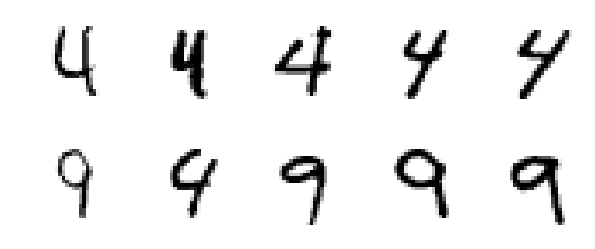

In [8]:
def P5(k=1):

### STUDENT START ###
    knn = KNeighborsClassifier(k)
    """fit knn on the development set"""
    knn.fit(mini_train_data, mini_train_labels)
    pred_labels = knn.predict(dev_data)
    
    """print confusion matrix"""
    matrix = confusion_matrix(dev_labels, pred_labels)
    print(matrix)
    
    """it appears 4s and 9s are being mixed up frequently"""
    num_examples = 5
    digits = [4, 9]
    #P1(examples, digits)
    
    image_dict = {}
    
    """Loop over each digit and add to dictionary"""
    for dig in digits:
        image_dict[dig] = []
        counter = 0
        """if label matches digit but predicted label does not equal digit, save dev data location"""
        while (len(image_dict[dig]) < num_examples):
            if ((dev_labels[counter] == dig) & (pred_labels[counter] != dig) & (pred_labels[counter] in digits)):
                image_dict[dig].append(counter)
            counter += 1
    
    """create subplots"""
    fig, ax = plt.subplots(len(digits), num_examples, figsize=(num_examples*2, len(digits)*2))
    counter = 0
    for dig in digits:
        for ex in range(0, num_examples):
            row = image_dict[dig][ex]
            ax[counter][ex].imshow(dev_data[row].reshape(28,28), cmap = "gray_r")
            ax[counter][ex].axis('off')

        counter += 1
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Original data (no blurring) accuracy: 0.888



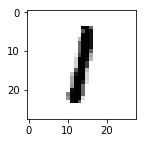

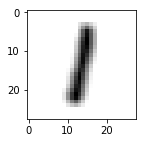

Blurred train only accuracy: 0.909



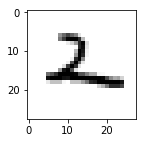

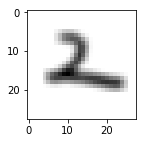

Blurred development only accuracy: 0.871

Blurred train AND development accuracy: 0.902



In [24]:
def P6(in_data = mini_train_data):
    """apply Gaussian blur to input np dataset"""
    
### STUDENT START ###
    """create empty array for blurred data"""
    blurred = np.zeros(in_data.shape)
    #print(in_data.shape[0])
    
    "go row by row/image by image (784 wide)"
    for image_num in range(0,in_data.shape[0]):
        "reshape current row/image to temp array"
        in_image = in_data[image_num].reshape(28,28)
        save_image = np.zeros((28,28))
        "for rows 1 thru 27"
        for r in range(1,in_image.shape[0]-1):
            "cols 1 thru 27"
            for c in range(1,in_image.shape[1]-1):
                #counter += 1
                sum_nine = 0
                for i in range(-1,2):
                    for j in range(-1,2):
                        sum_nine += in_image[r+i][c+j]
                save_image[r][c] = sum_nine / 9
        blurred[image_num] = save_image.reshape((1,784))
    
    #print(blur_train[1].reshape((28,28)))
    
    "output original example"
    plt.figure(figsize=(2,2))
    plt.imshow(in_data[5].reshape((28,28)), cmap = "gray_r")
    plt.show()
    "output blurred array"
    plt.figure(figsize=(2,2))
    plt.imshow(blurred[5].reshape((28,28)), cmap = "gray_r")
    plt.show()
    return blurred


def knn(train = mini_train_data, train_labels = mini_train_labels, test = dev_data, test_labels = dev_labels, k=1):
    """Run knn and print score on development set"""
    model = KNeighborsClassifier(k)
    model.fit(train, train_labels)
    print(model.score(test, test_labels))
    print()

### STUDENT END ###

#Original knn accuracy
print("Original data (no blurring) accuracy: ",end="")
knn()

#Blurred train only
blur_train = P6(mini_train_data)
print("Blurred train only accuracy: ",end="")
knn(train = blur_train, test = dev_data)

#Blurred development only
blur_dev = P6(dev_data)
print("Blurred development only accuracy: ",end="")
knn(test = blur_dev)

#Blurred both train and development
print("Blurred train AND development accuracy: ",end="")
knn(train = blur_train, test = blur_dev)

***ANSWER***: It appears performing a simple Gaussian blur on the train data improves the model accuracy, while blurring only the test set hurts it; blurring both also provides a similar improvement.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [15]:
def P7(categories = 2, cutoff = 1/3):

### STUDENT START ###
    
    if (categories == 2):
        
        nb = BernoulliNB(binarize = cutoff)
        nb.fit(mini_train_data, mini_train_labels)
        accuracy = nb.score(dev_data, dev_labels)
        print("Accuracy of BernoulliNB (" + "{:.3f}".format(cutoff) + " cutoff): ", end="")

        
    elif (categories == 3):
        nb = MultinomialNB()
        bucket_train = mini_train_data.copy()
        #bucket_train[bucket_train < (1/3)] = 0
        bucket_train[bucket_train > cutoff] = 2
        bucket_train[(0 < bucket_train) & (bucket_train <= cutoff)] = 1
        bucket_dev = dev_data.copy()
        bucket_dev[bucket_dev > cutoff] = 2
        bucket_dev[(0 < bucket_dev) & (bucket_dev <= cutoff)] = 1
        #print(bucket_dev[5])
        #print(dev_data[5])
        nb.fit(bucket_train, mini_train_labels)
        accuracy = nb.score(bucket_dev, dev_labels)
        print("Accuracy of MultinomialNB (0.0 level plus " + "{:.3f}".format(cutoff) + " cutoff):  ", end="")
        
    else:
        print("non-category")
        return None
        
    print(accuracy)

### STUDENT END ###

P7(categories=2, cutoff = 1/3)
print()
P7(categories=3, cutoff = 1/3)

Accuracy of BernoulliNB (0.333 cutoff): 0.82

Accuracy of MultinomialNB (0.0 level plus 0.333 cutoff):  0.794


**ANSWER**: Using a color threshold of .333 for both Naive Bayes classifiers, we see both achieve roughly 80% accuracy, with the simple Bernoulli mapping outperforming the three-level classifier slightly; here we made 0 it's own category, and made (0,.33] a gray level and (.33,1] considered black, where apparently the (light) gray versus white distinction does not help with classification.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [16]:
def P8(alphas, cutoff = 1/3):

### STUDENT START ###
    nb = BernoulliNB(binarize = cutoff, fit_prior=False)
    gs = GridSearchCV(nb, alphas)
    gs.fit(mini_train_data, mini_train_labels)
    for i in gs.grid_scores_:
        print(i)
    return gs

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\Colby\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}
mean: 0.82300, std: 0.01671, params: {'alpha': 0.0001}
mean: 0.82400, std: 0.01585, params: {'alpha': 0.001}
mean: 0.82600, std: 0.01443, params: {'alpha': 0.01}
mean: 0.82200, std: 0.01935, params: {'alpha': 0.1}
mean: 0.81400, std: 0.01265, params: {'alpha': 0.5}
mean: 0.80500, std: 0.00854, params: {'alpha': 1.0}
mean: 0.79700, std: 0.01188, params: {'alpha': 2.0}
mean: 0.73800, std: 0.01925, params: {'alpha': 10.0}


In [17]:
print (nb.best_params_)

{'alpha': 0.01}


**ANSWER**: Using a bernoulli cutoff of 1/3, the best performing alpha on average is .01. Note that for a = 0, the NB classifier errors out due to a division by zero.

(9) Try training a model using GaussianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [18]:
def P9(train = mini_train_data, test = dev_data, train_labels = mini_train_labels, dev_labels = dev_labels, display = "Original"):

### STUDENT START ###
    gnb = GaussianNB()
    gnb.fit(train, train_labels)
    score = gnb.score(test, dev_labels)
    print(display, "- accuracy:")
    print(score, "\n")
    return gnb

### STUDENT END ###

gnb = P9()

#print(gnb.theta_.shape)
#print(gnb.sigma_.shape)
#print(mini_train_labels[25])


#standardize to mean = 0 and sd = 1
def standardize(gnb):
    """transform feature values to standard normal for each digit class"""
    std_train = mini_train_data.copy()
    std_dev = dev_data.copy()
    
    "standardize train set"
    for row in range(0, std_train.shape[0]):
        label = int(mini_train_labels[row])
        std_train[row] = (std_train[row] - gnb.theta_[label]) / np.sqrt(gnb.sigma_[label])
    
    "standardize development set"
    for row in range(0, std_dev.shape[0]):
        label = int(dev_labels[row])
        std_dev[row] = (std_dev[row] - gnb.theta_[label]) / np.sqrt(gnb.sigma_[label])
    
    "test transformed sets in P9() function"
    std_gnb = P9(std_train, std_dev, display = "Standardized feature values")
    
    return(std_gnb)

standardized = standardize(gnb)
#print(tester[0].reshape((28,28)))

Original - accuracy:
0.621 

Standardized feature values - accuracy:
0.856 



**ANSWER**: Using the Gaussian Naive Bayes classifier on the raw data, the accuracy is considerably lower than the simple Bernoulli NB classifier because the feature values are not normally distributed. Instead, if we attempt to normalize the distributions by label (dividing the difference with the class mean by the standard deviation), the Gaussian NB performs considerably better than the Bernoulli NB classifier. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

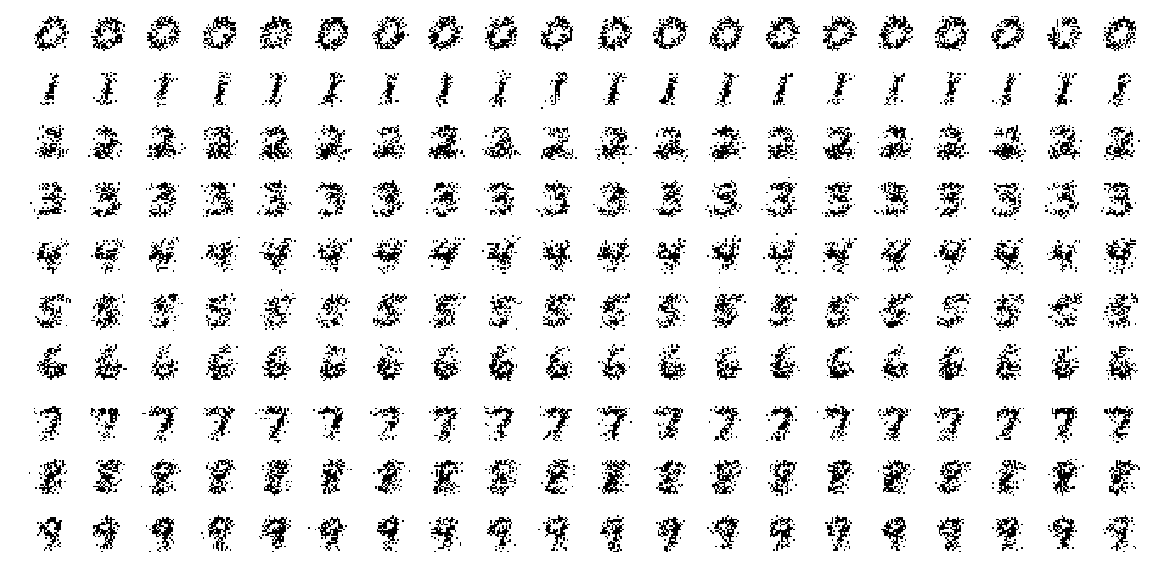

In [19]:
def P10(num_examples):

### STUDENT START ###
    "fit Bernoulli NB model"
    nb = BernoulliNB(binarize = 1/3, alpha = .01, fit_prior=False)
    nb.fit(mini_train_data, mini_train_labels)
    #print(nb.feature_log_prob_.shape)
    
    digits = [i for i in range(0,10)]
    
    """create 10x20 subplots"""
    fig, ax = plt.subplots(len(digits), num_examples, figsize=(20, 10))
    for dig in digits:
        for ex in range(0, num_examples):
            example = (np.random.rand(784) < np.exp(nb.feature_log_prob_[dig]))
            ax[dig][ex].imshow(example.reshape(28,28), cmap = "gray_r")
            ax[dig][ex].axis('off')
### STUDENT END ###

P10(20)

**ANSWER**: The generated digits are a little fuzzier than the real images, because the pixels are determined according to conditional probabilities rather than a determined pen stroke.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [20]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    "train model and get probs"
    nb = BernoulliNB(binarize = 1/3, alpha = .01, fit_prior=False)
    nb.fit(mini_train_data, mini_train_labels)
    preds = nb.predict_proba(dev_data)
    #print(preds.shape)
    
    "loop over predicted probs and count if correct label is made at bucket threshold"
    for bucket in range(len(buckets)): # 0 thru 8
        for row in range(0, preds.shape[0]): # each row in dev_data
            if (np.max(preds[row]) >= buckets[bucket]):
                total[bucket] += 1
                if (np.argmax(preds[row]) == dev_labels[row]):
                    correct[bucket] += 1
        
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.831
p(pred) <= 0.9000000000000    total = 973    accuracy = 0.841
p(pred) <= 0.9990000000000    total = 877    accuracy = 0.883
p(pred) <= 0.9999900000000    total = 805    accuracy = 0.906
p(pred) <= 0.9999999000000    total = 753    accuracy = 0.923
p(pred) <= 0.9999999990000    total = 696    accuracy = 0.934
p(pred) <= 0.9999999999900    total = 632    accuracy = 0.948
p(pred) <= 0.9999999999999    total = 555    accuracy = 0.962
p(pred) <= 1.0000000000000    total = 537    accuracy = 0.965


**ANSWER**: This classifier seems to be fairly well calibrated, because our posterior probability choice is strongly positively correlated with accuracy, albeit with a diminishing effect as the posterior gets larger.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()